In [1]:
import ChannelTomography as ChT

In [2]:
import qiskit

from qiskit import transpile, QuantumCircuit, QuantumRegister, ClassicalRegister



from qiskit import IBMQ
from qiskit import Aer,BasicAer, execute, assemble
from qiskit.providers.aer import AerSimulator

import qiskit.providers.aer.noise as noise
from qiskit.providers.aer.noise import NoiseModel, amplitude_damping_error,phase_damping_error
from qiskit.quantum_info.operators import Operator


# Needed for functions
import time
from copy import deepcopy
import numpy as np
from numpy import pi

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D

from qiskit.tools.visualization import plot_histogram, plot_state_city
from qiskit.visualization import plot_bloch_multivector

import qiskit.quantum_info as qi
from qiskit.quantum_info import state_fidelity
from qiskit.quantum_info import partial_trace, Statevector

# Tomography functions
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
from qiskit.ignis.verification.tomography import process_tomography_circuits, ProcessTomographyFitter
from qiskit.ignis.verification.tomography import gateset_tomography_circuits, GatesetTomographyFitter
import qiskit.ignis.mitigation.measurement as mc

from qiskit.circuit.gate import Gate
from qiskit.extensions import UGate

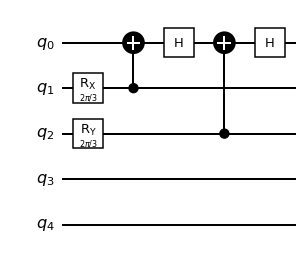

In [47]:
qreg_q = QuantumRegister(5, 'q')
circuit = QuantumCircuit(qreg_q)

# circuit.h(qreg_q[1])
# circuit.cx(qreg_q[1], qreg_q[2])
# circuit.cx(qreg_q[1], qreg_q[3])
# circuit.cx(qreg_q[1], qreg_q[4])
# circuit.cx(qreg_q[0], qreg_q[1])
# circuit.cx(qreg_q[0], qreg_q[2])
# circuit.cx(qreg_q[0], qreg_q[3])

# circuit.cx(qreg_q[3], qreg_q[4])
# circuit.cz(qreg_q[0], qreg_q[4])

circuit.rx(np.pi/1.5,qreg_q[1])
circuit.cx(qreg_q[1],qreg_q[0])
circuit.h(qreg_q[0])
circuit.ry(np.pi/1.5,qreg_q[2])
circuit.cx(qreg_q[2],qreg_q[0])
circuit.h(qreg_q[0])
# circuit.rx(-np.pi/1.5,qreg_q[3])
# circuit.cx(qreg_q[3],qreg_q[0])
# circuit.h(qreg_q[0])
# circuit.ry(-np.pi/1.5,qreg_q[4])
# circuit.cx(qreg_q[4],qreg_q[0])
# circuit.h(qreg_q[0])
%matplotlib inline
circuit.draw('mpl',style='bw')

In [48]:
backend = Aer.get_backend('qasm_simulator')

In [49]:
ch, job = ChT.channel_from_proc(backend=backend, circuit=circuit, measured = 0, prepeared = 0)
%matplotlib notebook
ChT.trans_sphere_from_channel(ch)
# %matplotlib inline


{(('Zp',), ('X',)): {'1': 2062, '0': 1938}, (('Zp',), ('Y',)): {'1': 1989, '0': 2011}, (('Zp',), ('Z',)): {'1': 2952, '0': 1048}, (('Zm',), ('X',)): {'1': 1968, '0': 2032}, (('Zm',), ('Y',)): {'1': 2047, '0': 1953}, (('Zm',), ('Z',)): {'0': 2974, '1': 1026}, (('Xp',), ('X',)): {'0': 995, '1': 3005}, (('Xp',), ('Y',)): {'1': 1989, '0': 2011}, (('Xp',), ('Z',)): {'1': 2010, '0': 1990}, (('Yp',), ('X',)): {'1': 2032, '0': 1968}, (('Yp',), ('Y',)): {'0': 2491, '1': 1509}, (('Yp',), ('Z',)): {'1': 1979, '0': 2021}}
Fit time: 0.011706352233886719
Average gate fidelity: F = 0.37967


<IPython.core.display.Javascript object>

In [50]:
creg = ClassicalRegister(1,"c")
circuit.add_register(creg)
circuit.measure(qreg_q[0],creg[0])

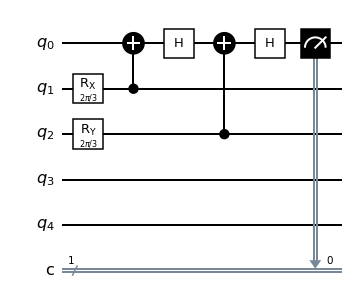

In [51]:
%matplotlib inline
circuit.draw('mpl',style='bw')

In [52]:
res,_ = ChT.final_state_tomography(backend=backend,circuit=circuit,measured=0)

In [57]:
res

DensityMatrix([[ 0.2532+0.j   , -0.014 -0.011j],
               [-0.014 +0.011j,  0.7468+0.j   ]],
              dims=(2,))


In [59]:
ChT.coord_from_matrix(res.data)

[-0.028000000000000257, 0.02200000000000011, -0.4935999999999999]